# Churn Prediction

#### Customer churn =  decision of a client (player, subscriber, user, etc.) to cease his or her relationship with a company.

For businesses, customer retention is a top priority. Acquiring new customers can be several times more expensive than retaining existing ones. Furthermore, gaining an understanding of the reasons customers churn and estimating the risk associated with individual customers are both powerful components of designing a data-driven retention strategy. A churn model can be the tool that brings these elements together and provides insights and outputs that drive decision making across an organization. 

Data set: http://www.iainpardoe.com/teaching/dsc433/data/Churn.xls

In [ ]:
%%bash
dl -mkdir dl://data-lake-1275.demo-containers.1445.bigstep.io/Churn_data
dl -copyFromLocal Churn_data/Churn.csv dl://data-lake-1275.demo-containers.1445.bigstep.io/Churn_data
dl -ls dl://data-lake-1275.demo-containers.1445.bigstep.io/Churn_data

In [82]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2018-06-19T08:41:06

CPython 2.7.14
IPython 5.7.0

compiler   : GCC 7.2.0
system     : Linux
release    : 3.10.0-693.2.2.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 16
interpreter: 64bit


## Project steps:
    1.) Data analysis
    2.) Data pre-processing
    3.) Evaluation of machine learning models
    4.) Conclusions

##  1.) Data analysis

### 1.1.) Import data and view variable type

In [489]:
import pandas as pd
import numpy as np

data = pd.read_csv('Churn.csv')
data.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [490]:
data.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


### 1.2.) Visualise data

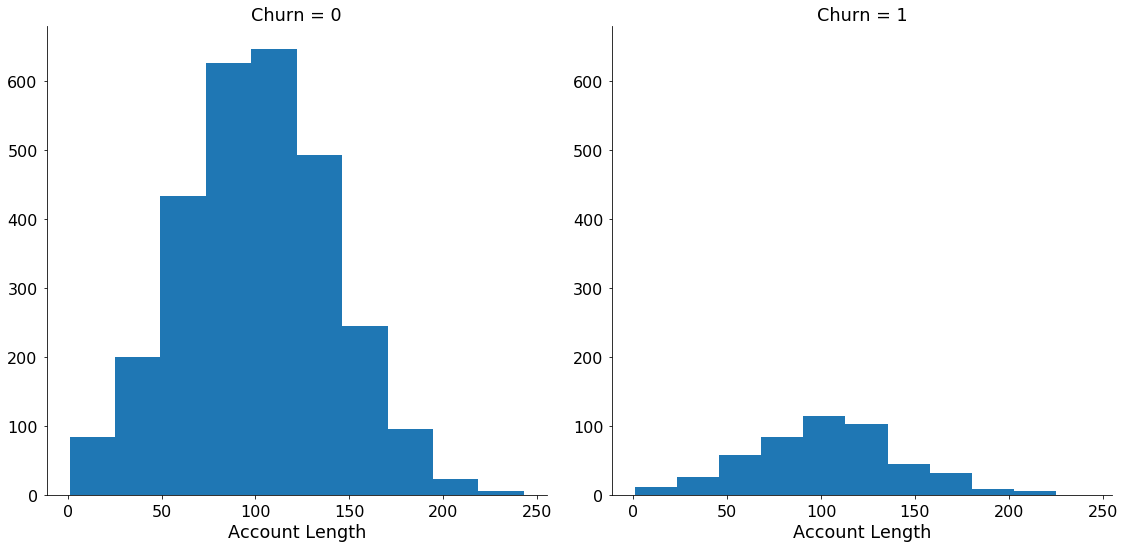

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper", font_scale = 2)

g = sns.FacetGrid(data, col = "Churn", size = 8)
g.map(plt.hist, "Account Length")
plt.show()

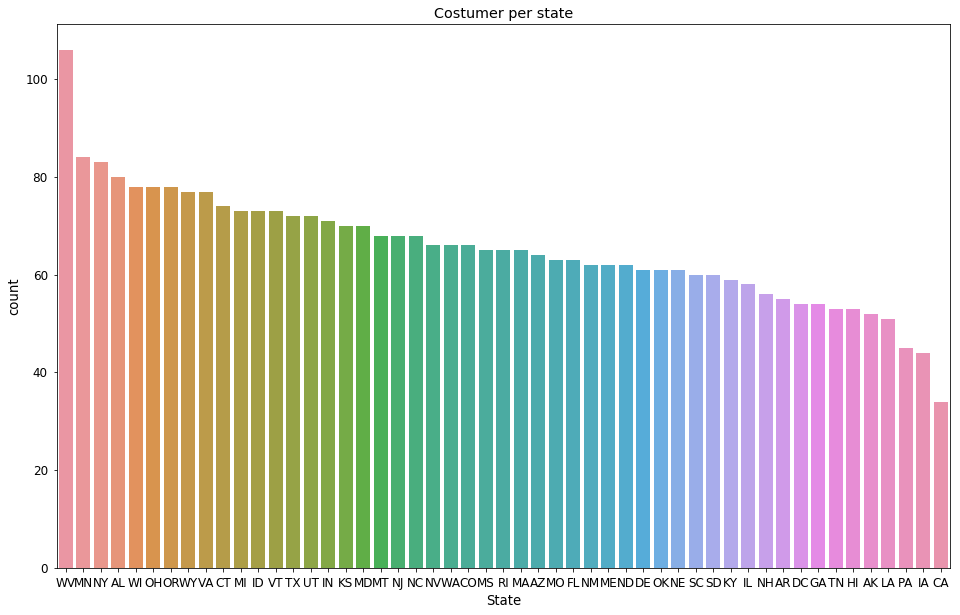

In [25]:
sns.set_context("paper", font_scale=1.5)

fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.countplot(x= data['State'], data = data,  order = data['State'].value_counts().index, ax = ax)
ax.set_title("Costumer per state")
plt.show()

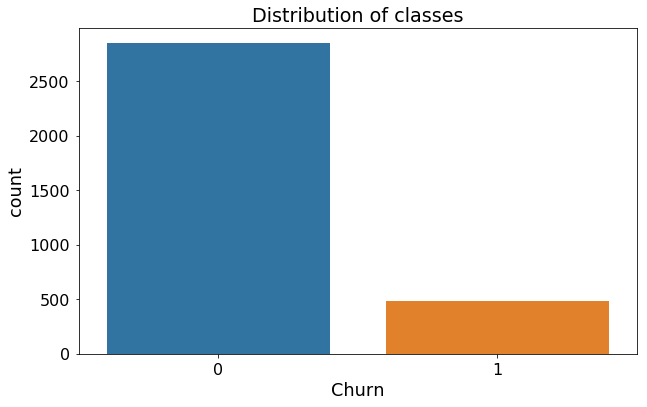

In [26]:
#Set parameters
sns.set_context("paper", font_scale=2)

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x= data['Churn'], data = data, ax = ax)
ax.set_title("Distribution of classes")
plt.show()

## 2.) Data pre-processing

### 2.1.) One-hot encode categorical variables

In [448]:
# Using labelencoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])
data['Area Code'] = label_encoder.fit_transform(data['Area Code'])

In [491]:
# Using dictionary
keys = list((data['State'].unique()))
values = list(range(1, 52, 1))
stateCodeDict = dict(zip(keys, values))

data['State'] = map(lambda x: stateCodeDict[x], data['State'])

In [456]:
feature = data['State'].values.reshape(-1, 1)
onehot_encoder = OneHotEncoder(sparse=False)
feature = onehot_encoder.fit_transform(feature)

In [463]:
result = pd.concat([data, pd.DataFrame(feature)], axis=1)

In [492]:
#Encode area codes (may be helpful for visualisation)
keys = data['Area Code'].unique()
values = [0, 1, 2]
areaCodeDict = dict(zip(keys, values))

data['Area Code'] = map(lambda x: areaCodeDict[x], data['Area Code'])
data['Area Code'].unique()

array([0, 1, 2], dtype=int64)

### 2.2.) Check correlation between variables

In [493]:
import seaborn as sns
corr = data.corr().round(decimals = 2)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "8pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code
Account Length,1,0,0.01,-0.01,-0.01,0.01,0,0.02,0.02,0,0.04,0.01,0.02,-0.01,-0.01,-0.01,0.02,0.01,0,-0.01
VMail Message,0,1,0,0.02,0.01,0,-0.01,-0.09,0.01,0.96,-0.01,0,-0.01,0.02,0.01,0.01,0.01,0,0,-0.01
Day Mins,0.01,0,1,0.01,0,-0.01,-0.01,0.21,0.05,0,0.01,1,0.02,0.01,0.02,0,0.01,-0.01,-0.01,-0.03
Eve Mins,-0.01,0.02,0.01,1,-0.01,-0.01,-0.01,0.09,0.02,0.02,-0.02,0.01,-0.01,1,0.01,-0.01,0,-0.01,0.01,0.01
Night Mins,-0.01,0.01,0,-0.01,1,-0.02,-0.01,0.04,-0.03,0.01,0.02,0,0,-0.01,0.01,1,-0.01,-0.02,0,-0.02
Intl Mins,0.01,0,-0.01,-0.01,-0.02,1,-0.01,0.07,0.05,0,0.02,-0.01,0.01,-0.01,-0.01,-0.02,0.03,1,-0.01,-0.03
CustServ Calls,0,-0.01,-0.01,-0.01,-0.01,-0.01,1,0.21,-0.02,-0.02,-0.02,-0.01,0,-0.01,-0.01,-0.01,-0.02,-0.01,0,0.02
Churn,0.02,-0.09,0.21,0.09,0.04,0.07,0.21,1,0.26,-0.1,0.02,0.21,0.01,0.09,0.01,0.04,-0.05,0.07,0.02,0.01
Int'l Plan,0.02,0.01,0.05,0.02,-0.03,0.05,-0.02,0.26,1,0.01,0,0.05,0.01,0.02,0.01,-0.03,0.02,0.05,0.03,0.04
VMail Plan,0,0.96,0,0.02,0.01,0,-0.02,-0.1,0.01,1,-0.01,0,-0.01,0.02,0.02,0.01,0.01,0,-0.01,-0.01


In [474]:
data.columns = data.columns.astype(str)

###### Note: Features the are correlated can be removed

In [494]:
remove = filter(lambda x: 'Charge' in x, data.columns) + ['VMail Message']
data_cleaned = data.drop(remove, axis = 1)

corr = data_cleaned.corr().round(decimals = 2)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Eve Calls,Night Calls,Intl Calls,State,Area Code
Account Length,1,0.01,-0.01,-0.01,0.01,0,0.02,0.02,0,0.04,0.02,-0.01,0.02,0,-0.01
Day Mins,0.01,1,0.01,0,-0.01,-0.01,0.21,0.05,0,0.01,0.02,0.02,0.01,-0.01,-0.03
Eve Mins,-0.01,0.01,1,-0.01,-0.01,-0.01,0.09,0.02,0.02,-0.02,-0.01,0.01,0,0.01,0.01
Night Mins,-0.01,0,-0.01,1,-0.02,-0.01,0.04,-0.03,0.01,0.02,0,0.01,-0.01,0,-0.02
Intl Mins,0.01,-0.01,-0.01,-0.02,1,-0.01,0.07,0.05,0,0.02,0.01,-0.01,0.03,-0.01,-0.03
CustServ Calls,0,-0.01,-0.01,-0.01,-0.01,1,0.21,-0.02,-0.02,-0.02,0,-0.01,-0.02,0,0.02
Churn,0.02,0.21,0.09,0.04,0.07,0.21,1,0.26,-0.1,0.02,0.01,0.01,-0.05,0.02,0.01
Int'l Plan,0.02,0.05,0.02,-0.03,0.05,-0.02,0.26,1,0.01,0,0.01,0.01,0.02,0.03,0.04
VMail Plan,0,0,0.02,0.01,0,-0.02,-0.1,0.01,1,-0.01,-0.01,0.02,0.01,-0.01,-0.01
Day Calls,0.04,0.01,-0.02,0.02,0.02,-0.02,0.02,0,-0.01,1,0.01,-0.02,0,-0.03,-0.01


In [495]:
# Ad customer ID column
data_cleaned['ID'] = data_cleaned.index

#Sample 10 customers for prediction
predictChurn = data_cleaned.sample(n = 10, replace=True, random_state=1)
predictChurn

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Eve Calls,Night Calls,Intl Calls,State,Area Code,Phone,ID
1061,132,174.5,245.6,172.8,10.3,1,0,0,1,101,105,76,9,51,0,336-4281,1061
235,139,134.4,211.3,193.6,10.2,5,1,0,0,106,98,125,2,38,2,374-9107,235
1096,93,98.4,249.6,248.2,14.2,1,0,0,0,78,129,114,4,11,0,406-5584,1096
905,161,191.9,70.9,204.8,13.4,4,1,0,0,113,87,107,4,9,0,418-9036,905
2763,116,155.7,185.4,192.7,8.2,3,0,0,1,104,118,116,2,40,1,338-7527,2763
2895,33,164.0,153.1,123.8,6.4,0,0,1,0,99,102,104,4,31,0,411-8956,2895
960,5,199.2,187.3,214.0,13.3,3,0,0,0,106,12,85,3,31,0,380-2758,960
144,117,167.1,177.5,249.4,14.1,2,1,1,0,86,87,132,7,16,1,390-2390,144
129,131,214.2,161.7,264.7,9.5,3,0,0,1,115,117,102,4,23,1,331-4902,129
2797,169,142.5,231.4,131.2,10.0,2,0,0,0,82,110,67,4,40,1,333-7869,2797


### 2.3.) Split data into training and test set

In [496]:
columns = list(data_cleaned.columns)
xHeader = [x for x in columns if x not in ['Churn', 'Phone', 'ID']]
yHeader = 'Churn'

#transform into arrays
X = data_cleaned[xHeader].values
y = data_cleaned[yHeader].values

#split into train and test set
from sklearn.model_selection import train_test_split
test_size = 0.20
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, stratify = y)
print('Train set size = {x}, Test set size = {y}'.format(x=len(X_train), y=len(X_test)))

Train set size = 2666, Test set size = 667


In [497]:
X_test

array([[ 102. ,  234.8,  199.2, ...,    1. ,    9. ,    1. ],
       [ 109. ,  170.7,  240.2, ...,    4. ,   31. ,    2. ],
       [ 130. ,  203.9,  191.8, ...,    4. ,   47. ,    2. ],
       ..., 
       [ 144. ,  133.3,  255.5, ...,    2. ,   44. ,    0. ],
       [  75. ,  222.4,  327. , ...,    9. ,   18. ,    0. ],
       [  28. ,  168.2,  161.7, ...,    3. ,   49. ,    0. ]])

### 2.4.) Plot data using dimensionality reduction

#### 2.4.1.) Using PCA

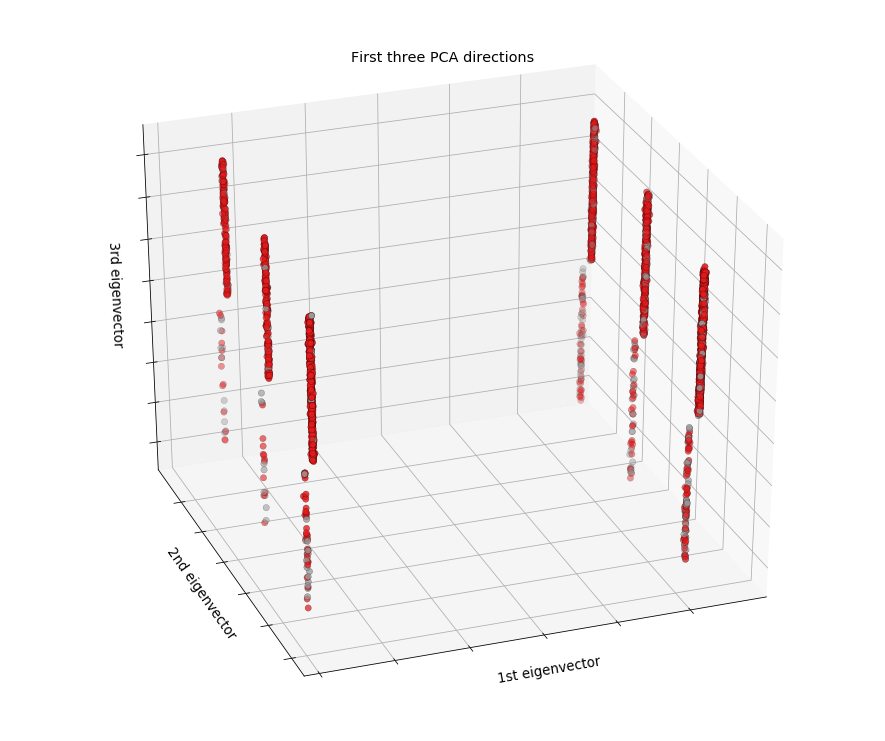

In [498]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#create pipeline
estimators = []
estimators.append(('rescale', MinMaxScaler(feature_range=(0, 1))))
estimators.append(('pca', PCA(n_components = 3)))
pipe = Pipeline(estimators)

#fist and transform
X_pca = pipe.fit_transform(X)

#plot
fig = plt.figure(1, figsize=(12, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

#### 2.4.2.) Using ISOMAP

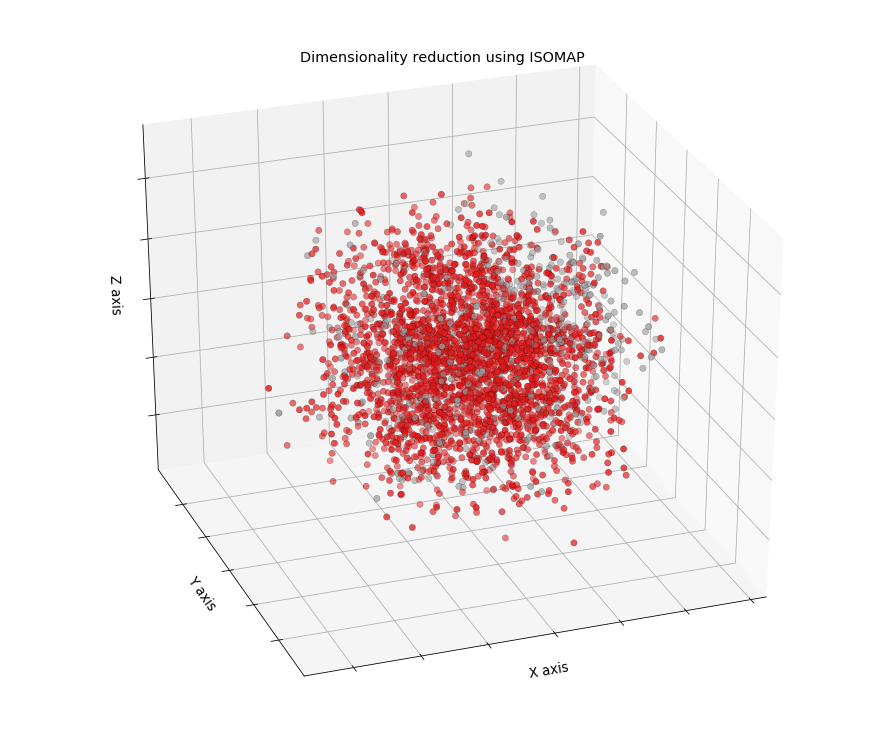

In [500]:
#create pipeline
estimators = []
# estimators.append(('rescale', MinMaxScaler(feature_range=(0, 1))))
estimators.append(('isomap', Isomap(n_components=3)))
pipe = Pipeline(estimators)

#fist and transform
X_isomap = pipe.fit_transform(X)

#plot
fig = plt.figure(1, figsize=(12, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_isomap[:, 0], X_isomap[:, 1], X_isomap[:, 2], c = y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Dimensionality reduction using ISOMAP")
ax.set_xlabel("X axis")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Y axis")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Z axis")
ax.w_zaxis.set_ticklabels([])
plt.show()

## 3.) Evaluation of machine learning models

### 3.1.) Using k-fold cross validation to assess model performance

In [502]:
# Compare Algorithms
# This cross-validation object is a variation of KFold that returns stratified folds. 
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


# Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis(solver='lsqr')))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# Gaussian Naive Bayes
models.append(('NB', GaussianNB()))
#Support Vector Machine
models.append(('SVM', SVC(kernel='rbf', probability = True)))
#Decision Tree classifiers
cart = DecisionTreeClassifier()
models.append(('BDT', BaggingClassifier(base_estimator=cart, n_estimators=100))) 
models.append(('CART', DecisionTreeClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=100)))
models.append(('ADA', AdaBoostClassifier(n_estimators=100)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100)))
#Neural network
models.append(('MLP', MLPClassifier(activation = 'logistic', solver = 'lbfgs')))

# evaluate each model in turn
results = []
names = []
# scoring = 'accuracy'

for name, model in models:
    
    estimators = []
    estimators.append(('rescale', MinMaxScaler(feature_range=(0, 1))))
    estimators.append((name, model))
    pipeline = Pipeline(estimators)

    kfold = StratifiedKFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.147908 (0.055477)
LDA: 0.238394 (0.047860)
QDA: 0.492645 (0.068533)
KNN: 0.238124 (0.085748)
NB: 0.427733 (0.054287)
SVM: 0.000000 (0.000000)
BDT: 0.743792 (0.089683)
CART: 0.744130 (0.079668)
GBC: 0.746694 (0.098965)
ADA: 0.367611 (0.096617)
ET: 0.396424 (0.105194)
MLP: 0.608772 (0.085020)


### 3.1.) Plot cross-validation accuracy

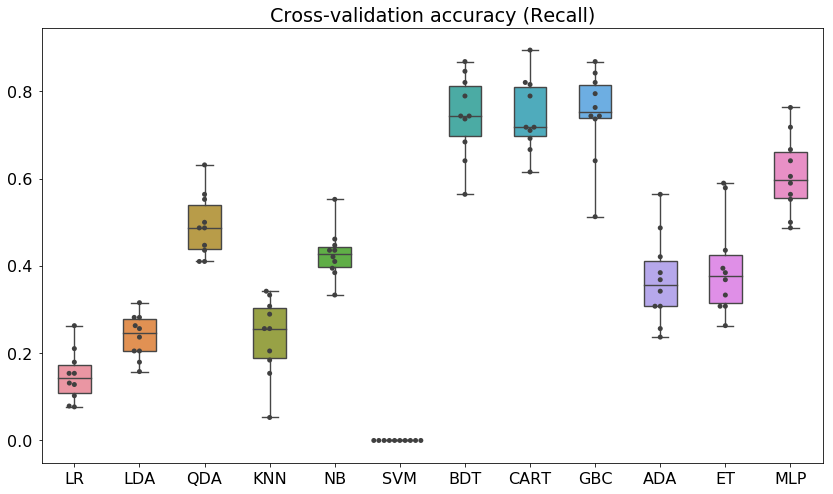

In [503]:
results_df = pd.DataFrame(results).T.rename(index = str, columns = dict(zip(range(len(results)), names)))

#Set parameters
sns.set_context("paper", font_scale=2)

fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(data = results_df, width = 0.5, whis = 10, ax = ax)
ax = sns.swarmplot(data= results_df, color=".25")
ax.set_title("Cross-validation accuracy (Recall)")
plt.show()

### 3.2.) Debugging algorithms with learning curves

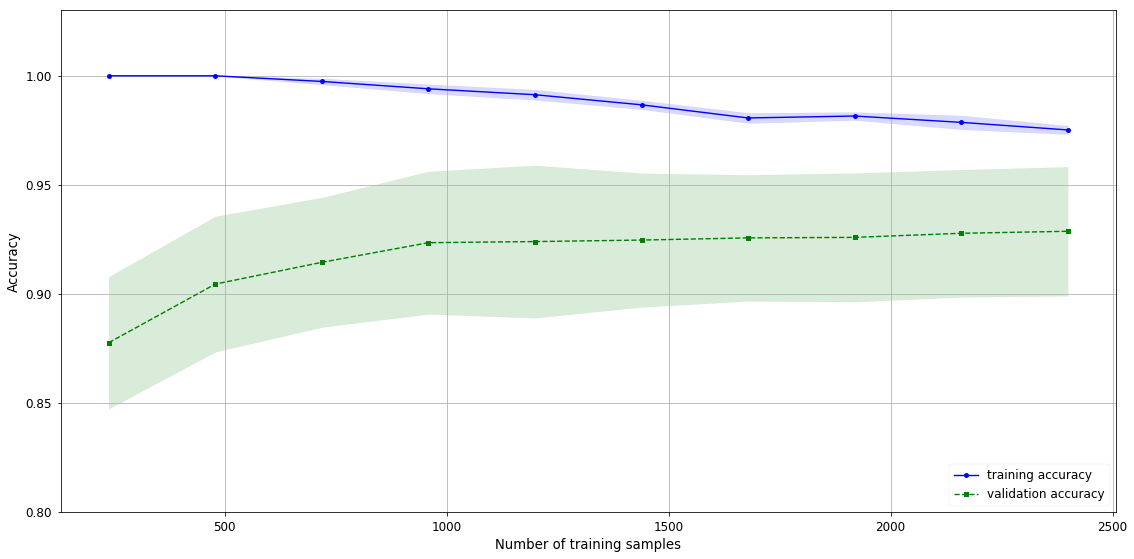

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(MinMaxScaler(feature_range=(0, 1)), GradientBoostingClassifier(n_estimators=100))

train_sizes, train_scores, test_scores = learning_curve(estimator = pipe,  
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        scoring = 'roc_auc',
                                                        cv = 10,
                                                        n_jobs = 1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(16, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('Churn_prediction/learning_curve.png', dpi=300)
plt.show()

__A learning curve__ shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

### 3.3.) Hyperparamater optimisation

In [504]:
# Use gridsearch to fine-tune best performing algorithm
# Pipline should be integrated here as well
# Validation curve should be plotted
from sklearn.model_selection import GridSearchCV

for i in range(5):
    estimators = np.array([100, 150, 200])
    param_grid = dict(n_estimators=estimators)

    model = GradientBoostingClassifier()
    kfold = StratifiedKFold(n_splits=5, random_state=7)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='recall')
    grid.fit(X_train, y_train)
    print('Model accuracy = {}, Model parameter = {}'.format(round(grid.best_score_, 2), grid.best_estimator_.n_estimators))

Model accuracy = 0.75, Model parameter = 100
Model accuracy = 0.75, Model parameter = 100
Model accuracy = 0.75, Model parameter = 100
Model accuracy = 0.75, Model parameter = 100
Model accuracy = 0.75, Model parameter = 100


### 3.4.) Plot the confusion matrix

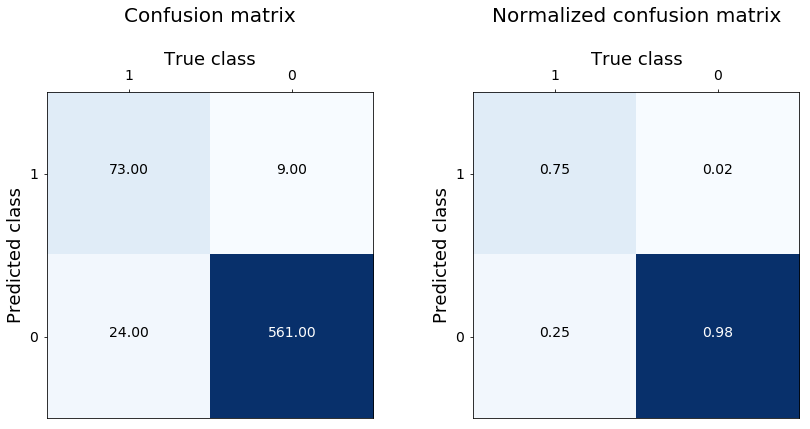

In [482]:
def plot_confusion_matrix(cnf_matrix, classes, cmap=plt.cm.Blues):
    """
    Plot the standard and normalized confusion matrix
    """
    tn, fp, fn, tp = cnf_matrix.ravel()
    cnf_m = np.matrix([[tp, fp],[fn, tn]])
    fig = plt.figure(figsize=(14, 6))
    
    for i in range(1, 3):
        ax = fig.add_subplot(1, 2, i)
        ax.imshow(new_cnf_matrix, interpolation='nearest', cmap=cmap)
        tick_marks = np.arange(len(classes))
        ax.set_xticklabels(classes, fontdict = {'fontsize':14})
        ax.set_xticks((1, 0))
        ax.xaxis.tick_top()
        ax.xaxis.set_label_text('True class',  fontdict = {'fontsize':18})
        ax.xaxis.set_label_position('top')
        ax.set_yticklabels(classes, fontdict = {'fontsize':14})
        ax.yaxis.set_label_text('Predicted class', fontdict = {'fontsize':18})
        ax.set_yticks((1, 0))

        if i == 1:
            ax.set_title('Confusion matrix', pad = 70, fontdict = {'fontsize':20})
        else:
            cnf_m = cnf_m.astype('float')/(np.zeros((2, 2)) + cnf_m.sum(axis=0))
            ax.set_title('Normalized confusion matrix', pad = 70, fontdict = {'fontsize':20} )

            
        fmt = '.2f' if normalize else 'd'
        thresh = cnf_m.max() / 1.2
            
        for r, c in itertools.product(range(cnf_m.shape[1]), range(cnf_m.shape[0])):
            ax.text(c, r, format(cnf_m[r, c], fmt),
                    horizontalalignment="center",
                    fontsize=14,
                    color="white" if cnf_m[r, c] > thresh else "black")
    plt.show()

# Fit model
pipe = make_pipeline(MinMaxScaler(feature_range=(0, 1)),  GradientBoostingClassifier(n_estimators=200))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Get predicted and true values
class_names = np.array([0, 1])
pred_label = y_pred
true_label = y_test

# Calculate confusion matrix
cnf_matrix = confusion_matrix(true_label, pred_label)
np.set_printoptions(precision=2)

plot_confusion_matrix(cnf_matrix, class_names)

## 4.) Conclusions

### 4.1.) Calculate accuracy on test set

In [505]:
model = GradientBoostingClassifier(n_estimators = 100, random_state = 7)
model.fit(X_train, y_train)

result = model.score(X_test, y_test) 
print("Accuracy: %.3f%%") % (result*100.0)

Accuracy: 95.052%


### 4.2.) Plot important features

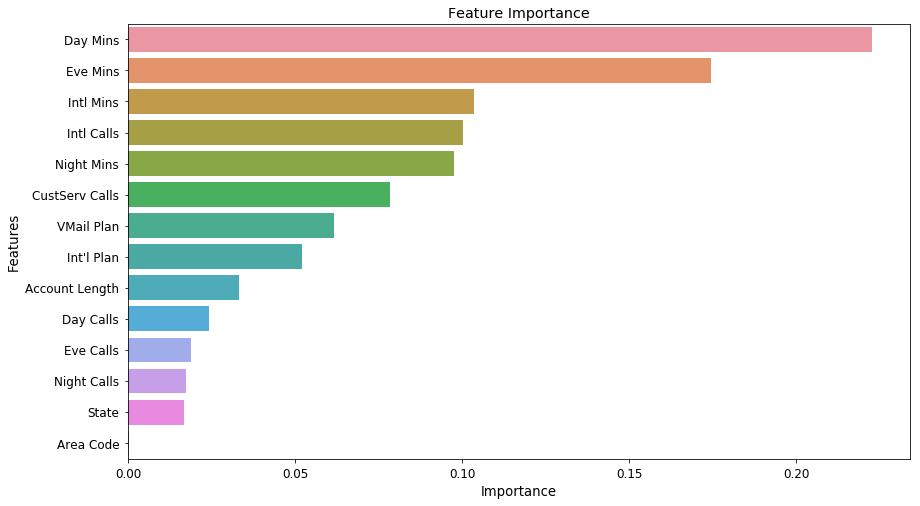

In [506]:
featureImportance = pd.DataFrame((zip(xHeader, model.feature_importances_))).rename(index = str, columns={0: "Features", 1: "Importance"})
featureImportance = featureImportance.sort_values(['Importance'], axis =0, ascending = False).reset_index(drop = True)

#Set parameters
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.barplot(x = 'Importance', y = 'Features', data = featureImportance, ax = ax)
ax.set_title("Feature Importance")
plt.show()

### 4.3.) Save model for future use

In [20]:
from pickle import dump 
from pickle import load

# Save model
filename = 'Churn_data/GBC_churn_model.sav' 
dump(model, open(filename, 'wb'))

# load the model from disk
model = load(open(filename, 'rb'))

In [22]:
import os
os.listdir(os.getcwd()+'/Churn_data')

['GBC_churn_model.sav', 'Churn.csv', '.ipynb_checkpoints']

### 4.4.) Load model and predict churn

In [42]:
X_predict = predictChurn[xHeader].values
prediction = model.predict(X_predict)
probability = map(lambda x: round(x, 2), model.predict_proba(X_predict)[:, 1])

useCols = ['ID', 'Phone', 'State', 'Prediction', 'Probability']
predictChurn['Prediction'] = prediction
predictChurn['Probability'] = probability
predictChurn[useCols]

,ID,Phone,State,Prediction,Probability
1061,1061,336-4281,51,0,0.02
235,235,374-9107,38,1,0.97
1096,1096,406-5584,11,0,0.03
905,905,418-9036,9,1,0.59
2763,2763,338-7527,40,0,0.03
2895,2895,411-8956,31,0,0.04
960,960,380-2758,31,0,0.02
144,144,390-2390,16,1,0.93
129,129,331-4902,23,0,0.02
2797,2797,333-7869,40,0,0.02
